In [1]:
# importing the necessary library to conduct analysis 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np


In [70]:
#loading the csv file 
data = pd.read_csv("fitness_class_2212.csv")
print(data.head(10))

   booking_id  months_as_member  weight days_before day_of_week time  \
0           1                17   79.56           8         Wed   PM   
1           2                10   79.01           2         Mon   AM   
2           3                16   74.53          14         Sun   AM   
3           4                 5   86.12          10         Fri   AM   
4           5                15   69.29           8         Thu   AM   
5           6                 7   93.33           2         Mon   AM   
6           7                11   88.59           6   Wednesday   PM   
7           8                 9   89.52          10         Fri   AM   
8           9                23   71.12          10        Fri.   AM   
9          10                 7   81.25          10         Fri   AM   

   category  attended  
0  Strength         0  
1      HIIT         0  
2  Strength         0  
3   Cycling         0  
4      HIIT         0  
5   Cycling         0  
6      HIIT         0  
7      HIIT    

In [3]:
#columns of the dataframe 
data.columns

Index(['booking_id', 'months_as_member', 'weight', 'days_before',
       'day_of_week', 'time', 'category', 'attended'],
      dtype='object')

In [4]:
# total number of rows and columns of a dataframe 
data.shape

(1500, 8)

In [5]:
#information about the each columns of the dataframe 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [6]:
#data type of all the columns of the dataframe 
data.dtypes

booking_id            int64
months_as_member      int64
weight              float64
days_before          object
day_of_week          object
time                 object
category             object
attended              int64
dtype: object

In [7]:
#checking if any columns has a null values 
data.isna().sum()

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

In [8]:
# checking the duplicates values 
data.duplicated().sum()

0

In [9]:
#selecting all the rows with the null values 
data[data.isnull().any(axis=1)]

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
114,115,14,NaN,10,Fri,AM,HIIT,0
211,212,16,NaN,10,Fri,AM,Cycling,0
315,316,5,NaN,14,Sun,AM,HIIT,0
366,367,4,NaN,2,Mon,AM,Aqua,0
482,483,14,NaN,1,Mon,PM,Aqua,0
552,553,11,NaN,9,Thu,AM,HIIT,0
655,656,5,NaN,12,Sat,AM,Strength,0
734,735,7,NaN,8,Thu,AM,HIIT,0
742,743,11,NaN,10,Wed,PM,HIIT,0
781,782,10,NaN,5,Tue,PM,HIIT,0


In [40]:
# replacing the missing value with average weight as only the weight columns contain the missing value 
data.fillna(data['weight'].mean())


,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10,Fri,AM,HIIT,0
1496,1497,29,89.55,2,Mon,AM,Strength,0
1497,1498,9,87.38,4,Tue,AM,HIIT,0
1498,1499,34,68.64,14,Sun,AM,Aqua,0


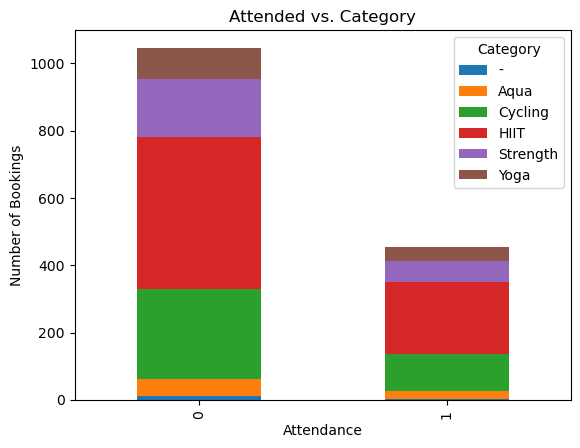

In [11]:
# performing the cross tabluation in order to separate the category in order to find out the number of attended and not attendead booking 
crosstab = pd.crosstab(data['attended'], data['category'])

# Create a bar plot
crosstab.plot(kind='bar', stacked=True,)
plt.xlabel("Attendance")
plt.ylabel("Number of Bookings")
plt.title("Attended vs. Category")
plt.legend(title="Category")
plt.show()


Text(0.5, 1.0, 'distribution of the number of months as a member')

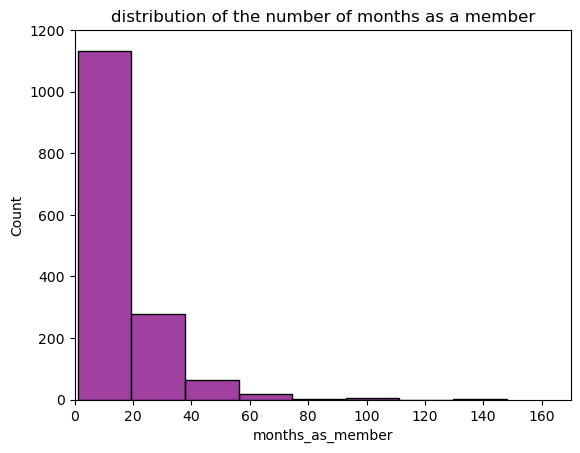

In [13]:
# distribution of the number of months as a member
sns.histplot(data=data,x='months_as_member',bins=8,color='purple')
plt.xlim(0,170)
plt.ylim(0,1200)
plt.title("distribution of the number of months as a member")

Text(0.5, 1.0, 'distribution of the number of months as a member (after transformation)')

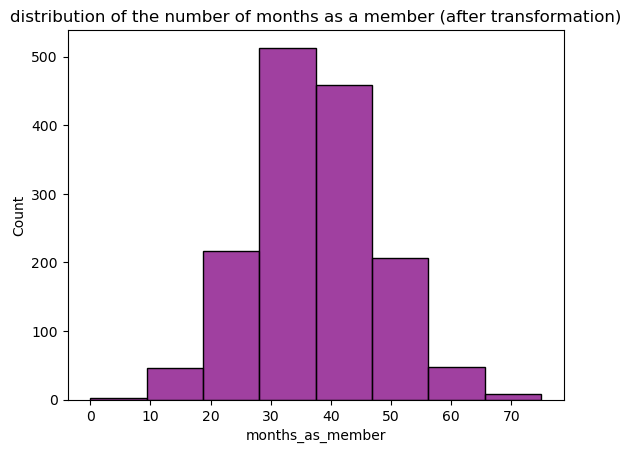

In [14]:
#applying log transformation with some constant multipled 
log1 = np.log(data['months_as_member']) * 15
sns.histplot(data=data,x=log1,bins=8,color='purple')
plt.title("distribution of the number of months as a member (after transformation)")



Text(0.5, 1.0, ' relationship between attendance and numbe of months as a member.')

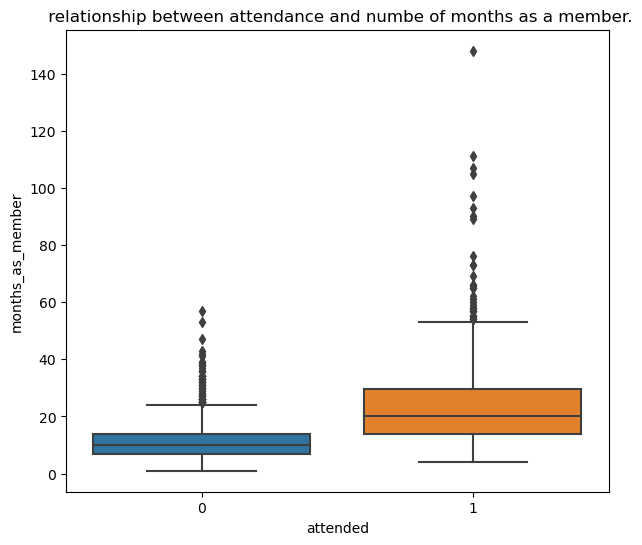

In [15]:
# boxplot the relationship between attendance and number of months as a member.
plt.figure(figsize=(7,6))
sns.boxplot(data=data, x='attended',y='months_as_member')
plt.title(' relationship between attendance and numbe of months as a member.')

(0.0, 80.0)

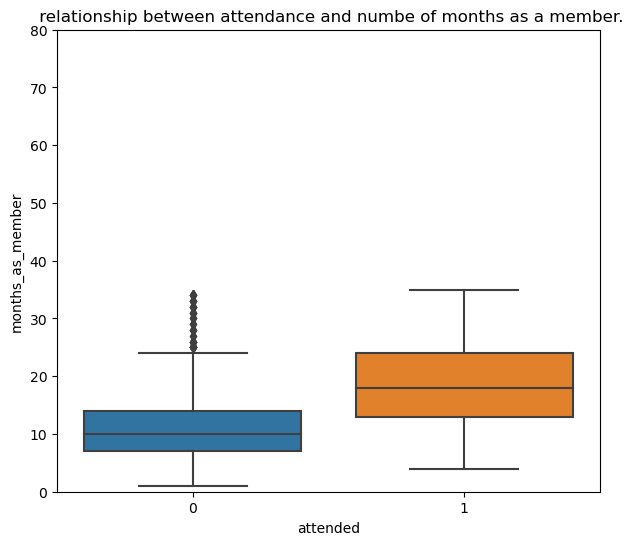

In [22]:
Q1 = data['months_as_member'].quantile(0.25)
Q3 = data['months_as_member'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds to filter outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a DataFrame with filtered data (excluding outliers)
df_filtered = data[(data['months_as_member'] >= lower_bound) & (data['months_as_member'] <= upper_bound)]

plt.figure(figsize=(7,6))
sns.boxplot(data=df_filtered, x='attended',y='months_as_member')
plt.title(' relationship between attendance and numbe of months as a member.')
plt.ylim(0,80)

In [20]:
data.groupby('attended')['months_as_member'].describe()

,count,mean,std,min,25%,50%,75%,max
attended,,,,,,,,
0,1046.0,11.495220,7.171546,1.0,7.0,10.0,14.00,57.0
1,454.0,25.151982,17.433856,4.0,14.0,20.0,29.75,148.0


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  f1_score
from sklearn.ensemble import RandomForestClassifier
X = np.array(data['months_as_member']).reshape(-1,1)  # Feature
y = data['attended']  # Target variable (0 for 'No' and 1 for 'Yes')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [71]:
#Fit a baseline model to predict whether members will attend using the data provided.
model = LogisticRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print(y_predict)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 1]


In [72]:
# random foreset classifier model 
model2 = RandomForestClassifier(n_estimators=90, random_state=62)
model2.fit(X_train, y_train)
y_predict2 = model2.predict(X_test)
print(y_predict2)

[0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 1 0 0 0 0 0]


In [73]:
#f1_score of logistic regression for model evaluation 
f1_logisticRegression =  f1_score(y_test,y_predict)
print(f1_logisticRegression)

0.5064377682403434


In [74]:
# f1_score of random forest classifier for model evaluation 
accuracy_randomforest = f1_score(y_test,y_predict2)
print(accuracy_randomforest)

0.42201834862385323
